In [ ]:
#한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#plt.rc('font', family = 'NanumBarunGothic)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
os.getcwd()

'/content'

#문제상황

철도회사에서 중요한 업무중 하나는 배차 스케줄을 최적화하여 철도 이용에 문제가 발생하지 않도록 유지하는 것

배차 스케줄 최적화를 위해 시간별 승, 하차 데이터를 수집했고, 이를 활용하여 최적의 배차 스케줄 계획 수립을 위한 방법을 찾고자 한다.

#데이터 살펴보기

In [ ]:
import json
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

df = pd.read_csv('rail.csv', encoding = 'cp949')
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202212,1호선,동대문,762,8,10546,1950,8505,5809,13440,10380,18824,19859,18641,21156,16546,21489,18381,25798,22990,26741,25110,24552,27548,23536,28399,22835,29057,21836,27937,20960,23840,20880,17073,19232,14042,13375,13368,11520,10411,11303,4793,8824,588,2402,23,254,1,4,0,0,20230103
1,202212,1호선,동묘앞,194,5,2748,1031,3605,4484,6064,8011,10633,19614,8934,16106,9662,17978,14509,24904,20576,29326,26930,32414,31647,30359,33723,25397,35073,17921,28363,12638,16538,10124,7857,7483,5220,5862,4406,5628,3394,6372,1358,3859,122,1683,2,453,0,36,0,0,20230103
2,202212,1호선,서울역,604,24,8028,7918,12137,44148,38148,100206,66885,212880,57091,153222,59851,82986,78423,73091,87639,85302,88454,84810,77844,74634,98797,82501,118826,86127,172813,97338,211286,101385,111667,69010,83684,51711,86082,46253,59774,30941,26461,15356,2776,3500,43,707,1,46,0,0,20230103
3,202212,1호선,시청,127,1,2197,4277,3713,21598,7195,61522,9565,191043,11529,93176,15194,43226,22724,43034,24603,39679,29949,40146,37984,34552,49761,31743,58514,34403,89785,37748,164532,33842,68288,16723,59372,10126,59335,9012,39531,6960,13533,4727,1934,1126,102,110,2,7,0,0,20230103
4,202212,1호선,신설동,348,13,8308,2096,8716,7826,20270,21977,30116,55144,19563,32225,17631,21808,20105,19364,21661,18770,23362,19349,23962,18973,25588,20057,31311,21850,39984,24533,50985,30270,20215,20539,14664,14372,12664,14223,9080,12773,3964,9203,393,2276,13,85,0,6,0,0,20230103


In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56339 entries, 0 to 56338
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           56339 non-null  int64 
 1   호선명           56339 non-null  object
 2   지하철역          56339 non-null  object
 3   04시-05시 승차인원  56339 non-null  int64 
 4   04시-05시 하차인원  56339 non-null  int64 
 5   05시-06시 승차인원  56339 non-null  int64 
 6   05시-06시 하차인원  56339 non-null  int64 
 7   06시-07시 승차인원  56339 non-null  int64 
 8   06시-07시 하차인원  56339 non-null  int64 
 9   07시-08시 승차인원  56339 non-null  int64 
 10  07시-08시 하차인원  56339 non-null  int64 
 11  08시-09시 승차인원  56339 non-null  int64 
 12  08시-09시 하차인원  56339 non-null  int64 
 13  09시-10시 승차인원  56339 non-null  int64 
 14  09시-10시 하차인원  56339 non-null  int64 
 15  10시-11시 승차인원  56339 non-null  int64 
 16  10시-11시 하차인원  56339 non-null  int64 
 17  11시-12시 승차인원  56339 non-null  int64 
 18  11시-12시 하차인원  56339 non-null  int64 
 19  12시-

In [ ]:
df.describe()

,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
count,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,5.633900e+04
mean,201864.351000,197.933155,2.830206,5146.976428,1297.705373,10575.828254,6992.368785,27465.347592,16022.580628,31261.529686,36919.379524,19528.669820,24231.176112,14817.201388,15825.228598,14942.973713,14914.408882,16281.275972,15631.137596,17042.769449,16984.441701,16867.627079,16627.809209,18548.066437,17368.588012,21271.244857,19270.952360,26624.878521,23322.441861,35700.016117,32402.057065,20786.765101,28387.581444,16110.063491,17403.305774,15401.617388,15503.008112,12582.202471,14443.843785,5315.228598,9372.327145,620.055734,2699.455226,3.702302,86.698717,0.301141,1.180053,0.017341,0.092831,2.018734e+07
std,228.408629,652.956832,7.394002,5982.036106,1453.255168,10489.273675,7530.963394,28500.512413,20805.431131,33482.539907,52248.466526,20156.381916,35234.838020,13906.424411,19241.391092,13934.971042,17884.837105,15497.596522,18120.209365,17102.415617,19892.063161,17503.821849,18984.976097,20065.991040,19038.529705,22900.525062,20498.750847,30232.388560,24548.984721,47541.857239,34676.119265,28856.876845,30767.989276,23455.343543,18678.229081,23953.318069,16893.548673,21806.204449,16356.393354,10284.087698,10841.035253,1533.075985,3637.452852,34.960310,332.369970,17.623930,12.158043,0.702385,3.479405,2.290145e+04
min,201501.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.015121e+07
25%,201702.000000,4.000000,0.000000,1419.000000,383.000000,3323.000000,2292.000000,7763.000000,4497.000000,9465.000000,8511.500000,6655.000000,5348.000000,5418.000000,4326.000000,5584.000000,4267.000000,6032.000000,4720.000000,6159.000000,5118.000000,5797.000000,5188.500000,6154.000000,5680.500000,7109.000000,6405.000000,8313.500000,7771.500000,8979.000000,10507.500000,4880.000000,8779.500000,3543.500000,5483.000000,3069.500000,4783.500000,2143.500000,4334.000000,774.000000,2707.500000,11.000000,449.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.017031e+07
50%,201902.000000,20.000000,0.000000,3346.000000,889.000000,7524.000000,4793.000000,19109.000000,9257.000000,21679.000000,19667.000000,14002.000000,12426.000000,11146.000000,9315.000000,11331.000000,9099.000000,12143.000000,9971.000000,12207.000000,10768.000000,11734.000000,10833.000000,12459.000000,11785.000000,14413.000000,13563.000000,17156.000000,16575.000000,19618.000000,22622.000000,11028.000000,19708.000000,8043.0000

In [ ]:
df.shape

(56339, 52)

In [ ]:
#중복데이터를 만들고 중복데이터 삭제 실습

In [ ]:
#중복 데이터 확인
df.duplicated().value_counts()

,count
False,56339


In [ ]:
#중복데이터 임의 추출
df_sample = df.sample(frac = 0.05, random_state = 1000)
df_sample.shape

(2817, 52)

In [ ]:
#원본데이터 + 중복데이터
df = pd.concat([df, df_sample], axis = 0)
df.shape

(59156, 52)

In [ ]:
#중복 데이터 확인
df.duplicated().value_counts()

,count
False,56339
True,2817


#문제해결 프로세스 정의

##문제정의

상황: 지하철 배차 스케줄 오류로 지하철 혼잡시간 증가

리스크: 혼잡시간 증가로 시민 불편 및 안전사고 건수 증가, 피해보상금액 증가

##기대효과

지하철 배차 스케줄 최적화로 지하철 혼잡시간 밀집도 저하

밀집도 저하로 인한 고객 만족 상승 및 안전사고 감소로 피해보상금액 절감

지하철 역 특성 파악으로 맞춤 운영안 계획

##해결방안

지하철 상, 하차 시간 분석을 통해 혼잡시간 시간대 탐색

상, 하차 Seasonality 분석을 통한 계절별 배차 스케줄 설계


Session 1

- Data 전처리
- Data EDA

Session 2
- Feature Engineering

Session 3
- 호선별 밀집도 분석
- 시간대별 분석

##성과측정

배차 스케줄 최적화를 통한 혼잡시간 시간대 밀집도 모니터링

최적화 전, 후 고객만족도, 안전사고, 밀집도 측정

배차 스케줄 최적화 전, 후 상위 지표에 대한 정략적 차이 분석으로 성과측정 진행

#Session 1

## Data 전처리

In [ ]:
df.shape

(59156, 52)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59156 entries, 0 to 612
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           59156 non-null  int64 
 1   호선명           59156 non-null  object
 2   지하철역          59156 non-null  object
 3   04시-05시 승차인원  59156 non-null  int64 
 4   04시-05시 하차인원  59156 non-null  int64 
 5   05시-06시 승차인원  59156 non-null  int64 
 6   05시-06시 하차인원  59156 non-null  int64 
 7   06시-07시 승차인원  59156 non-null  int64 
 8   06시-07시 하차인원  59156 non-null  int64 
 9   07시-08시 승차인원  59156 non-null  int64 
 10  07시-08시 하차인원  59156 non-null  int64 
 11  08시-09시 승차인원  59156 non-null  int64 
 12  08시-09시 하차인원  59156 non-null  int64 
 13  09시-10시 승차인원  59156 non-null  int64 
 14  09시-10시 하차인원  59156 non-null  int64 
 15  10시-11시 승차인원  59156 non-null  int64 
 16  10시-11시 하차인원  59156 non-null  int64 
 17  11시-12시 승차인원  59156 non-null  int64 
 18  11시-12시 하차인원  59156 non-null  int64 
 19  12시-13시 승차인

In [ ]:
#null 확인
print(df.isnull().sum())

사용월             0
호선명             0
지하철역            0
04시-05시 승차인원    0
04시-05시 하차인원    0
05시-06시 승차인원    0
05시-06시 하차인원    0
06시-07시 승차인원    0
06시-07시 하차인원    0
07시-08시 승차인원    0
07시-08시 하차인원    0
08시-09시 승차인원    0
08시-09시 하차인원    0
09시-10시 승차인원    0
09시-10시 하차인원    0
10시-11시 승차인원    0
10시-11시 하차인원    0
11시-12시 승차인원    0
11시-12시 하차인원    0
12시-13시 승차인원    0
12시-13시 하차인원    0
13시-14시 승차인원    0
13시-14시 하차인원    0
14시-15시 승차인원    0
14시-15시 하차인원    0
15시-16시 승차인원    0
15시-16시 하차인원    0
16시-17시 승차인원    0
16시-17시 하차인원    0
17시-18시 승차인원    0
17시-18시 하차인원    0
18시-19시 승차인원    0
18시-19시 하차인원    0
19시-20시 승차인원    0
19시-20시 하차인원    0
20시-21시 승차인원    0
20시-21시 하차인원    0
21시-22시 승차인원    0
21시-22시 하차인원    0
22시-23시 승차인원    0
22시-23시 하차인원    0
23시-24시 승차인원    0
23시-24시 하차인원    0
00시-01시 승차인원    0
00시-01시 하차인원    0
01시-02시 승차인원    0
01시-02시 하차인원    0
02시-03시 승차인원    0
02시-03시 하차인원    0
03시-04시 승차인원    0
03시-04시 하차인원    0
작업일자            0
dtype: int64


In [ ]:
#중복데이터 확인
df.duplicated().value_counts()

,count
False,56339
True,2817


In [ ]:
#중복데이터 제거
df = df.drop_duplicates(keep = 'first')
df.duplicated().value_counts()

,count
False,56339


In [ ]:
df.columns

Index(['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원',
       '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원',
       '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원',
       '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원',
       '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원',
       '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원',
       '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원',
       '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원',
       '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원',
       '03시-04시 하차인원', '작업일자'],
      dtype='object')

In [ ]:
#Zero 비율 확인
list_of_df = []

for i in df.columns:
  loof_df = pd.DataFrame({'val': [i],
                          'zero_cnt': df[df[i] == 0].count()[0]})
  list_of_df.append(loof_df)

df_merge = pd.concat(list_of_df).reset_index(drop = True)
df_merge['zero_ratio'] = df_merge['zero_cnt'] / len(df)
df_merge.sort_values(by = ['zero_ratio'], ascending = False)

##예측모델링이 주 목적이 아님!!
##분석목적이므로 0 비율이 높아도 삭제하면 절대 안됌

,val,zero_cnt,zero_ratio
50,03시-04시 하차인원,56147,0.996592
49,03시-04시 승차인원,56124,0.996184
47,02시-03시 승차인원,54563,0.968477
48,02시-03시 하차인원,52107,0.924883
45,01시-02시 승차인원,41363,0.734181
46,01시-02시 하차인원,32846,0.583006
4,04시-05시 하차인원,30257,0.537052
3,04시-05시 승차인원,6633,0.117734
43,00시-01시 승차인원,4303,0.076377
44,00시-01시 하차인원,1708,0.030316


In [ ]:
#03-04시 상,하차 인원이 매우 적지만, 24시간에 대한 분석을 진행할 것이기 때문에 삭제할 필요 X
df.shape

(56339, 52)

In [ ]:
df.describe()

,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
count,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,56339.000000,5.633900e+04
mean,201864.351000,197.933155,2.830206,5146.976428,1297.705373,10575.828254,6992.368785,27465.347592,16022.580628,31261.529686,36919.379524,19528.669820,24231.176112,14817.201388,15825.228598,14942.973713,14914.408882,16281.275972,15631.137596,17042.769449,16984.441701,16867.627079,16627.809209,18548.066437,17368.588012,21271.244857,19270.952360,26624.878521,23322.441861,35700.016117,32402.057065,20786.765101,28387.581444,16110.063491,17403.305774,15401.617388,15503.008112,12582.202471,14443.843785,5315.228598,9372.327145,620.055734,2699.455226,3.702302,86.698717,0.301141,1.180053,0.017341,0.092831,2.018734e+07
std,228.408629,652.956832,7.394002,5982.036106,1453.255168,10489.273675,7530.963394,28500.512413,20805.431131,33482.539907,52248.466526,20156.381916,35234.838020,13906.424411,19241.391092,13934.971042,17884.837105,15497.596522,18120.209365,17102.415617,19892.063161,17503.821849,18984.976097,20065.991040,19038.529705,22900.525062,20498.750847,30232.388560,24548.984721,47541.857239,34676.119265,28856.876845,30767.989276,23455.343543,18678.229081,23953.318069,16893.548673,21806.204449,16356.393354,10284.087698,10841.035253,1533.075985,3637.452852,34.960310,332.369970,17.623930,12.158043,0.702385,3.479405,2.290145e+04
min,201501.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.015121e+07
25%,201702.000000,4.000000,0.000000,1419.000000,383.000000,3323.000000,2292.000000,7763.000000,4497.000000,9465.000000,8511.500000,6655.000000,5348.000000,5418.000000,4326.000000,5584.000000,4267.000000,6032.000000,4720.000000,6159.000000,5118.000000,5797.000000,5188.500000,6154.000000,5680.500000,7109.000000,6405.000000,8313.500000,7771.500000,8979.000000,10507.500000,4880.000000,8779.500000,3543.500000,5483.000000,3069.500000,4783.500000,2143.500000,4334.000000,774.000000,2707.500000,11.000000,449.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.017031e+07
50%,201902.000000,20.000000,0.000000,3346.000000,889.000000,7524.000000,4793.000000,19109.000000,9257.000000,21679.000000,19667.000000,14002.000000,12426.000000,11146.000000,9315.000000,11331.000000,9099.000000,12143.000000,9971.000000,12207.000000,10768.000000,11734.000000,10833.000000,12459.000000,11785.000000,14413.000000,13563.000000,17156.000000,16575.000000,19618.000000,22622.000000,11028.000000,19708.000000,8043.0000

##Data EDA

In [ ]:
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202212,1호선,동대문,762,8,10546,1950,8505,5809,13440,10380,18824,19859,18641,21156,16546,21489,18381,25798,22990,26741,25110,24552,27548,23536,28399,22835,29057,21836,27937,20960,23840,20880,17073,19232,14042,13375,13368,11520,10411,11303,4793,8824,588,2402,23,254,1,4,0,0,20230103
1,202212,1호선,동묘앞,194,5,2748,1031,3605,4484,6064,8011,10633,19614,8934,16106,9662,17978,14509,24904,20576,29326,26930,32414,31647,30359,33723,25397,35073,17921,28363,12638,16538,10124,7857,7483,5220,5862,4406,5628,3394,6372,1358,3859,122,1683,2,453,0,36,0,0,20230103
2,202212,1호선,서울역,604,24,8028,7918,12137,44148,38148,100206,66885,212880,57091,153222,59851,82986,78423,73091,87639,85302,88454,84810,77844,74634,98797,82501,118826,86127,172813,97338,211286,101385,111667,69010,83684,51711,86082,46253,59774,30941,26461,15356,2776,3500,43,707,1,46,0,0,20230103
3,202212,1호선,시청,127,1,2197,4277,3713,21598,7195,61522,9565,191043,11529,93176,15194,43226,22724,43034,24603,39679,29949,40146,37984,34552,49761,31743,58514,34403,89785,37748,164532,33842,68288,16723,59372,10126,59335,9012,39531,6960,13533,4727,1934,1126,102,110,2,7,0,0,20230103
4,202212,1호선,신설동,348,13,8308,2096,8716,7826,20270,21977,30116,55144,19563,32225,17631,21808,20105,19364,21661,18770,23362,19349,23962,18973,25588,20057,31311,21850,39984,24533,50985,30270,20215,20539,14664,14372,12664,14223,9080,12773,3964,9203,393,2276,13,85,0,6,0,0,20230103


In [ ]:
#분석 진행을 위한 기복적인 데이터 파악 1
df['사용월'].unique(), df['사용월'].nunique()

(array([202212, 202211, 202210, 202209, 202208, 202207, 202206, 202205,
        202204, 202203, 202202, 202201, 202112, 202111, 202110, 202109,
        202108, 202107, 202106, 202105, 202104, 202103, 202102, 202101,
        202012, 202011, 202010, 202009, 202008, 202007, 202006, 202005,
        202004, 202003, 202002, 202001, 201912, 201911, 201910, 201909,
        201908, 201907, 201906, 201905, 201904, 201903, 201902, 201901,
        201812, 201811, 201810, 201809, 201808, 201807, 201806, 201805,
        201804, 201803, 201802, 201801, 201712, 201711, 201710, 201709,
        201708, 201707, 201706, 201705, 201704, 201703, 201702, 201701,
        201612, 201611, 201610, 201609, 201608, 201607, 201606, 201605,
        201604, 201603, 201602, 201601, 201512, 201511, 201510, 201509,
        201508, 201507, 201506, 201505, 201504, 201503, 201502, 201501]),
 96)

In [ ]:
#분석 진행을 위한 기복적인 데이터 파악 2
df['호선명'].unique(), df['호선명'].nunique()

(array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
        '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
        '과천선', '분당선', '수인선', '신림선', '안산선', '우이신설선', '일산선', '장항선', '중앙선',
        '9호선2단계'], dtype=object),
 27)

In [ ]:
#분석 진행을 위한 기복적인 데이터 파악 3
df['지하철역'].unique(), df['지하철역'].nunique()

(array(['동대문', '동묘앞', '서울역', '시청', '신설동', '제기동', '종각', '종로3가', '종로5가',
        '청량리(서울시립대입구)', '강남', '강변(동서울터미널)', '건대입구', '교대(법원.검찰청)',
        '구로디지털단지', '구의(광진구청)', '낙성대(강감찬)', '당산', '대림(구로구청)', '도림천',
        '동대문역사문화공원(DDP)', '뚝섬', '문래', '방배', '봉천', '사당', '삼성(무역센터)', '상왕십리',
        '서울대입구(관악구청)', '서초', '선릉', '성수', '신답', '신당', '신대방', '신도림', '신림',
        '신정네거리', '신촌', '아현', '양천구청', '역삼', '영등포구청', '왕십리(성동구청)', '용답',
        '용두(동대문구청)', '을지로3가', '을지로4가', '을지로입구', '이대', '잠실(송파구청)', '잠실나루',
        '잠실새내', '종합운동장', '충정로(경기대입구)', '한양대', '합정', '홍대입구', '가락시장',
        '경복궁(정부서울청사)', '경찰병원', '고속터미널', '구파발', '금호', '남부터미널(예술의전당)', '녹번',
        '대청', '대치', '도곡', '독립문', '동대입구', '매봉', '무악재', '불광', '수서', '신사',
        '안국', '압구정', '약수', '양재(서초구청)', '연신내', '오금', '옥수', '일원', '잠원', '지축',
        '충무로', '학여울', '홍제', '길음', '남태령', '노원', '당고개', '동작(현충원)', '명동',
        '미아(서울사이버대학)', '미아사거리', '삼각지', '상계', '성신여대입구(돈암)', '수유(강북구청)',
        '숙대입구(갈월)', '신용산', '쌍문', '이촌(국립중앙박물관)', '창동', '총신대입구(이수)',
 

In [ ]:
#numeric, categorical value 나누기
num_list = df.select_dtypes(exclude = 'object').columns
cal_list = df.select_dtypes(include = 'object').columns
print('num_list: ', num_list)
print('cal_list: ', cal_list)

num_list:  Index(['사용월', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원', '05시-06시 하차인원',
       '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원', '07시-08시 하차인원',
       '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원', '09시-10시 하차인원',
       '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원', '11시-12시 하차인원',
       '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원', '13시-14시 하차인원',
       '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원', '15시-16시 하차인원',
       '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원', '17시-18시 하차인원',
       '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원', '19시-20시 하차인원',
       '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원', '21시-22시 하차인원',
       '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원', '23시-24시 하차인원',
       '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원', '01시-02시 하차인원',
       '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원', '03시-04시 하차인원', '작업일자'],
      dtype='object')
cal_list:  Index(['호선명', '지하철역'], dtype='object')


In [ ]:
#num_list unique value 확인
for i in num_list:
  print(i, ':', df[i].nunique())

사용월 : 96
04시-05시 승차인원 : 2592
04시-05시 하차인원 : 113
05시-06시 승차인원 : 14947
05시-06시 하차인원 : 6017
06시-07시 승차인원 : 23435
06시-07시 하차인원 : 18014
07시-08시 승차인원 : 36305
07시-08시 하차인원 : 27704
08시-09시 승차인원 : 37813
08시-09시 하차인원 : 37516
09시-10시 승차인원 : 31591
09시-10시 하차인원 : 32568
10시-11시 승차인원 : 27778
10시-11시 하차인원 : 27894
11시-12시 승차인원 : 27864
11시-12시 하차인원 : 27059
12시-13시 승차인원 : 28998
12시-13시 하차인원 : 27966
13시-14시 승차인원 : 29514
13시-14시 하차인원 : 29159
14시-15시 승차인원 : 29303
14시-15시 하차인원 : 28965
15시-16시 승차인원 : 30451
15시-16시 하차인원 : 29804
16시-17시 승차인원 : 32279
16시-17시 하차인원 : 31191
17시-18시 승차인원 : 35131
17시-18시 하차인원 : 33983
18시-19시 승차인원 : 37804
18시-19시 하차인원 : 38353
19시-20시 승차인원 : 30950
19시-20시 하차인원 : 36620
20시-21시 승차인원 : 27416
20시-21시 하차인원 : 30030
21시-22시 승차인원 : 26570
21시-22시 하차인원 : 28375
22시-23시 승차인원 : 23754
22시-23시 하차인원 : 27377
23시-24시 승차인원 : 15196
23시-24시 하차인원 : 21623
00시-01시 승차인원 : 4714
00시-01시 하차인원 : 10424
01시-02시 승차인원 : 317
01시-02시 하차인원 : 1810
02시-03시 승차인원 : 79
02시-03시 하차인원 : 187
03시-04시 승차인원 : 26
03시-04시 하차인원 : 61
작업

In [ ]:
#dataframe화 시키기
list_of_df = []

for i in num_list:
  loof_df = pd.DataFrame({'val': [i],
                          'nunique': df[i].nunique()})

  list_of_df.append(loof_df)

df_merge = pd.concat(list_of_df).reset_index(drop = True)
df_merge.sort_values(by = 'nunique', ascending = False)

,val,nunique
30,18시-19시 하차인원,38353
9,08시-09시 승차인원,37813
29,18시-19시 승차인원,37804
10,08시-09시 하차인원,37516
32,19시-20시 하차인원,36620
7,07시-08시 승차인원,36305
27,17시-18시 승차인원,35131
28,17시-18시 하차인원,33983
12,09시-10시 하차인원,32568
25,16시-17시 승차인원,32279


In [ ]:
#cal_list unique value 확인
print('호선명:', df['호선명'].nunique())
print('지하철역:', df['지하철역'].nunique())
print('수집기간: ', df['사용월'].min(), '~', df['사용월'].max())

호선명: 27
지하철역: 589
수집기간:  201501 ~ 202212


#Session 2

##Feature Engineering

In [ ]:
#승하차 인원 합치기
df_re = df[['사용월', '호선명', '지하철역']]

df_re['04-05시'] = df.loc[:, ['04시-05시 승차인원', '04시-05시 하차인원']].sum(axis = 1)
df_re['05-06시'] = df.loc[:, ['05시-06시 승차인원', '05시-06시 하차인원']].sum(axis = 1)
df_re['06-07시'] = df.loc[:, ['06시-07시 승차인원', '06시-07시 하차인원']].sum(axis = 1)
df_re['07-08시'] = df.loc[:, ['07시-08시 승차인원', '07시-08시 하차인원']].sum(axis = 1)
df_re['08-09시'] = df.loc[:, ['08시-09시 승차인원', '08시-09시 하차인원']].sum(axis = 1)
df_re['09-10시'] = df.loc[:, ['09시-10시 승차인원', '09시-10시 하차인원']].sum(axis = 1)
df_re['10-11시'] = df.loc[:, ['10시-11시 승차인원', '10시-11시 하차인원']].sum(axis = 1)
df_re['11-12시'] = df.loc[:, ['11시-12시 승차인원', '11시-12시 하차인원']].sum(axis = 1)
df_re['12-13시'] = df.loc[:, ['12시-13시 승차인원', '12시-13시 하차인원']].sum(axis = 1)
df_re['13-14시'] = df.loc[:, ['13시-14시 승차인원', '13시-14시 하차인원']].sum(axis = 1)
df_re['14-15시'] = df.loc[:, ['14시-15시 승차인원', '14시-15시 하차인원']].sum(axis = 1)
df_re['15-16시'] = df.loc[:, ['15시-16시 승차인원', '15시-16시 하차인원']].sum(axis = 1)
df_re['16-17시'] = df.loc[:, ['16시-17시 승차인원', '16시-17시 하차인원']].sum(axis = 1)
df_re['17-18시'] = df.loc[:, ['17시-18시 승차인원', '17시-18시 하차인원']].sum(axis = 1)
df_re['18-19시'] = df.loc[:, ['18시-19시 승차인원', '18시-19시 하차인원']].sum(axis = 1)
df_re['19-20시'] = df.loc[:, ['19시-20시 승차인원', '19시-20시 하차인원']].sum(axis = 1)
df_re['20-21시'] = df.loc[:, ['20시-21시 승차인원', '20시-21시 하차인원']].sum(axis = 1)
df_re['21-22시'] = df.loc[:, ['21시-22시 승차인원', '21시-22시 하차인원']].sum(axis = 1)
df_re['22-23시'] = df.loc[:, ['22시-23시 승차인원', '22시-23시 하차인원']].sum(axis = 1)
df_re['23-24시'] = df.loc[:, ['23시-24시 승차인원', '23시-24시 하차인원']].sum(axis = 1)
df_re['00-01시'] = df.loc[:, ['00시-01시 승차인원', '00시-01시 하차인원']].sum(axis = 1)
df_re['01-02시'] = df.loc[:, ['01시-02시 승차인원', '01시-02시 하차인원']].sum(axis = 1)
df_re['02-03시'] = df.loc[:, ['02시-03시 승차인원', '02시-03시 하차인원']].sum(axis = 1)
df_re['03-04시'] = df.loc[:, ['03시-04시 승차인원', '03시-04시 하차인원']].sum(axis = 1)

In [ ]:
df_re.head()

,사용월,호선명,지하철역,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시
0,202212,1호선,동대문,770,12496,14314,23820,38683,39797,38035,44179,49731,49662,51084,51234,50893,48897,44720,36305,27417,24888,21714,13617,2990,277,5,0
1,202212,1호선,동묘앞,199,3779,8089,14075,30247,25040,27640,39413,49902,59344,62006,59120,52994,41001,26662,15340,11082,10034,9766,5217,1805,455,36,0
2,202212,1호선,서울역,628,15946,56285,138354,279765,210313,142837,151514,172941,173264,152478,181298,204953,270151,312671,180677,135395,132335,90715,41817,6276,750,47,0
3,202212,1호선,시청,128,6474,25311,68717,200608,104705,58420,65758,64282,70095,72536,81504,92917,127533,198374,85011,69498,68347,46491,18260,3060,212,9,0
4,202212,1호선,신설동,361,10404,16542,42247,85260,51788,39439,39469,40431,42711,42935,45645,53161,64517,81255,40754,29036,26887,21853,13167,2669,98,6,0


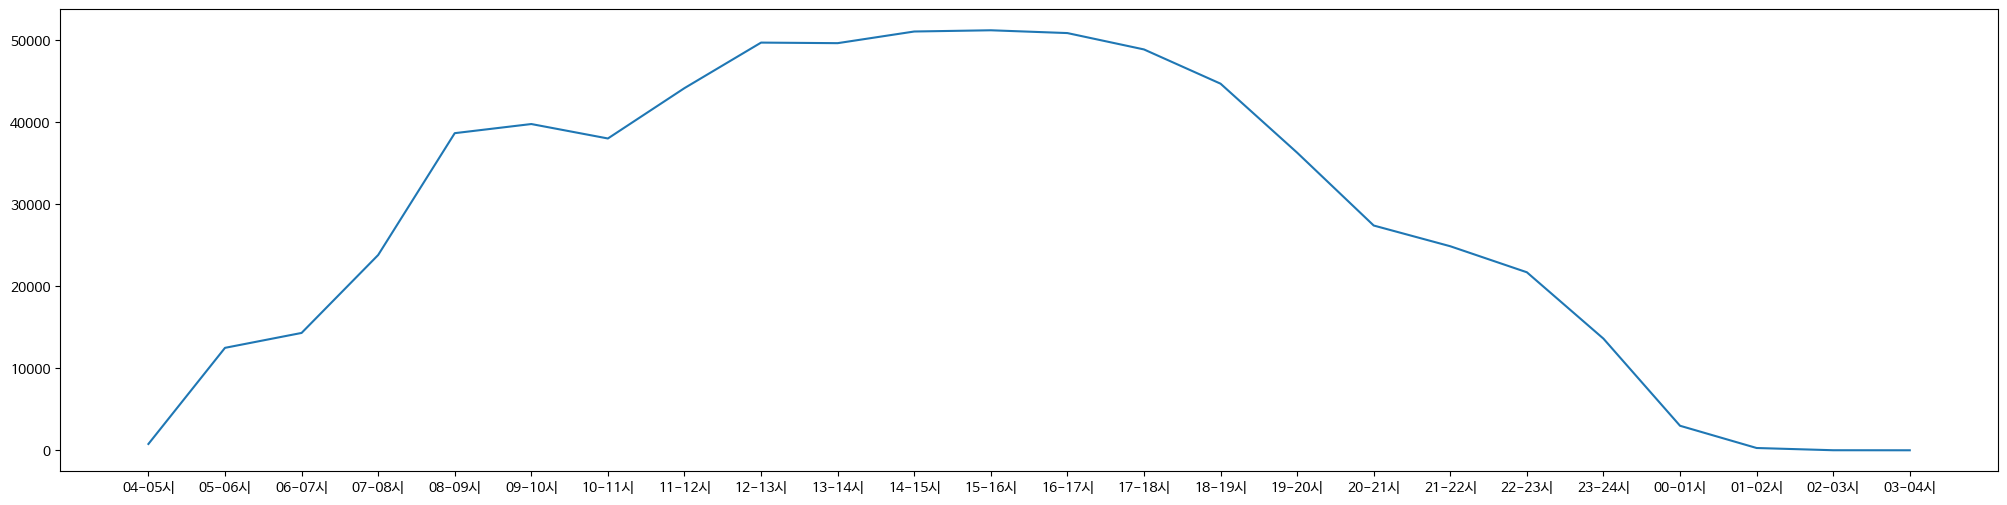

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family = 'NanumBarunGothic')

plt.plot(df_re.T.iloc[3:, 0])
plt.gcf().set_size_inches(25, 6)

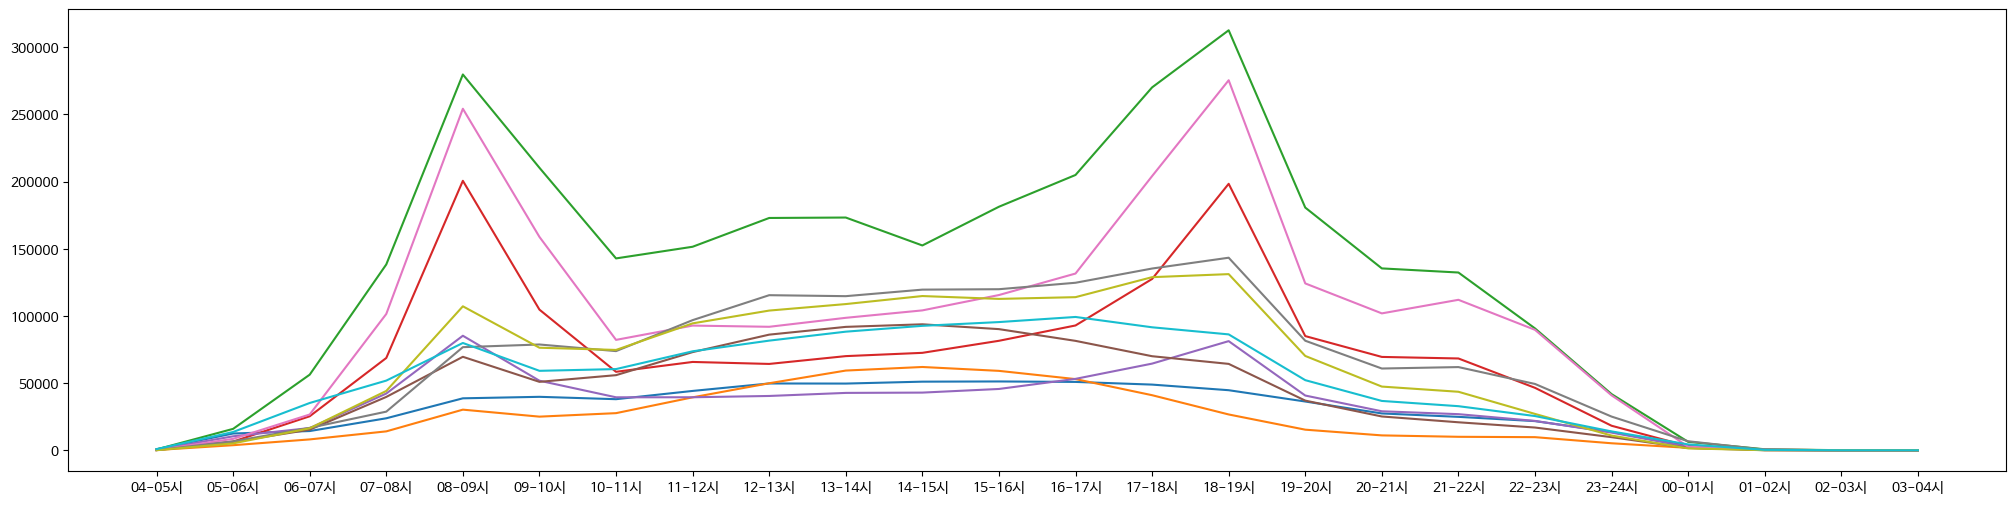

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family = 'NanumBarunGothic')

for i in range(0,10):
  plt.plot(df_re.T.iloc[3:, i])
  plt.gcf().set_size_inches(25, 6)

### 1.역별 + 시간별 밀집도

In [ ]:
df_re.head(2)

,사용월,호선명,지하철역,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시
0,202212,1호선,동대문,770,12496,14314,23820,38683,39797,38035,44179,49731,49662,51084,51234,50893,48897,44720,36305,27417,24888,21714,13617,2990,277,5,0
1,202212,1호선,동묘앞,199,3779,8089,14075,30247,25040,27640,39413,49902,59344,62006,59120,52994,41001,26662,15340,11082,10034,9766,5217,1805,455,36,0


In [ ]:
df_re.iloc[:, 3:].sum(axis = 1)#행 더하기

,0
0,685528
1,553246
2,3051410
3,1528250
4,790635
...,...
56334,59319
56335,18137
56336,354381
56337,40805


In [ ]:
#호선, 역별 월 총 유동인구
df_re['sum'] = df_re.iloc[:, 3:].sum(axis = 1)
df_re.head(2)

,사용월,호선명,지하철역,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시,sum
0,202212,1호선,동대문,770,12496,14314,23820,38683,39797,38035,44179,49731,49662,51084,51234,50893,48897,44720,36305,27417,24888,21714,13617,2990,277,5,0,685528
1,202212,1호선,동묘앞,199,3779,8089,14075,30247,25040,27640,39413,49902,59344,62006,59120,52994,41001,26662,15340,11082,10034,9766,5217,1805,455,36,0,553246


In [ ]:
#유동인구 합계를 이용하여 시간 별 밀집도 계산
df_re.iloc[:, 3:-1].apply(lambda x: x / df_re['sum'])#각 셀을 유동인구 합계로 나누기 ##전체유동인구 합계가 아닌 역별 유동인구 합계로 나눈 것임

,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시
0,0.001123,0.018228,0.020880,0.034747,0.056428,0.058053,0.055483,0.064445,0.072544,0.072443,0.074518,0.074737,0.074239,0.071328,0.065234,0.052959,0.039994,0.036305,0.031675,0.019864,0.004362,0.000404,0.000007,0.0
1,0.000360,0.006831,0.014621,0.025441,0.054672,0.045260,0.049960,0.071240,0.090199,0.107265,0.112077,0.106860,0.095787,0.074110,0.048192,0.027727,0.020031,0.018137,0.017652,0.009430,0.003263,0.000822,0.000065,0.0
2,0.000206,0.005226,0.018446,0.045341,0.091684,0.068923,0.046810,0.049654,0.056676,0.056782,0.049970,0.059415,0.067167,0.088533,0.102468,0.059211,0.044371,0.043368,0.029729,0.013704,0.002057,0.000246,0.000015,0.0
3,0.000084,0.004236,0.016562,0.044965,0.131266,0.068513,0.038227,0.043028,0.042062,0.045866,0.047463,0.053332,0.060800,0.083450,0.129805,0.055626,0.045476,0.044722,0.030421,0.011948,0.002002,0.000139,0.000006,0.0
4,0.000457,0.013159,0.020922,0.053434,0.107837,0.065502,0.049883,0.049921,0.051137,0.054021,0.054304,0.057732,0.067238,0.081601,0.102772,0.051546,0.036725,0.034007,0.027640,0.016654,0.003376,0.000124,0.000008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56334,0.000000,0.003928,0.017617,0.033160,0.048366,0.079367,0.085656,0.071967,0.051383,0.071276,0.077951,0.090426,0.087898,0.082115,0.059374,0.047017,0.029856,0.028692,0.017617,0.012542,0.003793,0.000000,0.000000,0.0
56335,0.000055,0.016320,0.025418,0.043282,0.064344,0.069085,0.083917,0.067486,0.061091,0.059216,0.057893,0.073496,0.071015,0.067045,0.070795,0.049016,0.042344,0.025197,0.022606,0.021558,0.008822,0.000000,0.000000,0.0
56336,0.000042,0.015105,0.029976,0.071073,0.091328,0.057737,0.047187,0.043829,0.047601,0.051196,0.049639,0.052839,0.057636,0.062263,0.078859,0.078653,0.053654,0.043814,0.039850,0.022913,0.004806,0.000000,0.000000,0.0
56337,0.000000,0.005171,0.012670,0.042887,0.050509,0.093812,0.121088,0.076045,0.059282,0.055581,0.070408,0.086019,0.081289,0.079378,0.059772,0.039064,0.019900,0.018111,0.015880,0.010857,0.002279,0.000000,0.000000,0.0


### 시간별 밀집도

In [ ]:
df_re.head(2)

,사용월,호선명,지하철역,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시,sum
0,202212,1호선,동대문,770,12496,14314,23820,38683,39797,38035,44179,49731,49662,51084,51234,50893,48897,44720,36305,27417,24888,21714,13617,2990,277,5,0,685528
1,202212,1호선,동묘앞,199,3779,8089,14075,30247,25040,27640,39413,49902,59344,62006,59120,52994,41001,26662,15340,11082,10034,9766,5217,1805,455,36,0,553246


In [ ]:
#필요 컬럼만 추출
df_re[df_re.columns[3:-1]].head()

,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시
0,770,12496,14314,23820,38683,39797,38035,44179,49731,49662,51084,51234,50893,48897,44720,36305,27417,24888,21714,13617,2990,277,5,0
1,199,3779,8089,14075,30247,25040,27640,39413,49902,59344,62006,59120,52994,41001,26662,15340,11082,10034,9766,5217,1805,455,36,0
2,628,15946,56285,138354,279765,210313,142837,151514,172941,173264,152478,181298,204953,270151,312671,180677,135395,132335,90715,41817,6276,750,47,0
3,128,6474,25311,68717,200608,104705,58420,65758,64282,70095,72536,81504,92917,127533,198374,85011,69498,68347,46491,18260,3060,212,9,0
4,361,10404,16542,42247,85260,51788,39439,39469,40431,42711,42935,45645,53161,64517,81255,40754,29036,26887,21853,13167,2669,98,6,0


In [ ]:
#각 셀을 전체 유동인구로 나누어 모든 역별 시간별 비교 가능하게 데이터 scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_re[df_re.columns[3:-1]])

scaled_data = scaler.transform(df_re[df_re.columns[3:-1]])

mmscaled_data = pd.DataFrame(scaled_data, columns = df_re.columns[3:-1])

mmscaled_data.head()

,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시
0,0.056435,0.192403,0.102655,0.068926,0.070715,0.077835,0.132435,0.147288,0.148674,0.116377,0.134623,0.126253,0.119257,0.094913,0.060024,0.065515,0.075863,0.063294,0.053988,0.056723,0.055283,0.040699,0.001589,0.0
1,0.014585,0.058186,0.058011,0.040728,0.055293,0.048973,0.096241,0.131399,0.149185,0.139065,0.163406,0.145686,0.124180,0.079586,0.035786,0.027682,0.030664,0.025518,0.024281,0.021732,0.033373,0.066853,0.011439,0.0
2,0.046028,0.245523,0.403656,0.400345,0.511428,0.411332,0.497349,0.505131,0.517018,0.406022,0.401829,0.446762,0.480265,0.524386,0.419670,0.326043,0.374640,0.336549,0.225547,0.174193,0.116040,0.110197,0.014935,0.0
3,0.009381,0.099681,0.181522,0.198841,0.366724,0.204783,0.203414,0.219230,0.192175,0.164259,0.191156,0.200846,0.217732,0.247552,0.266259,0.153408,0.192302,0.173817,0.115592,0.076064,0.056578,0.031149,0.002860,0.0
4,0.026459,0.160192,0.118633,0.122247,0.155861,0.101288,0.137324,0.131585,0.120871,0.100088,0.113148,0.112480,0.124572,0.125233,0.109061,0.073543,0.080343,0.068378,0.054334,0.054848,0.049348,0.014399,0.001907,0.0


# Session 3

## Analyzing

데이터 집중 분석 및 인사이트 추출


*   새로 추출한 지표를 활용하여 분석 진행

### 호선별 밀집도 분석

In [ ]:
df_re.head(2)

,사용월,호선명,지하철역,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시,sum
0,202212,1호선,동대문,770,12496,14314,23820,38683,39797,38035,44179,49731,49662,51084,51234,50893,48897,44720,36305,27417,24888,21714,13617,2990,277,5,0,685528
1,202212,1호선,동묘앞,199,3779,8089,14075,30247,25040,27640,39413,49902,59344,62006,59120,52994,41001,26662,15340,11082,10034,9766,5217,1805,455,36,0,553246


In [ ]:
#호선별 + 시간별 밀집도 분석
df_line_time = df_re.copy()
df_line_time = df_line_time.groupby('호선명')[list(df_line_time.columns[3:-1])].sum()
df_line_time['sum'] = df_line_time.sum(axis = 1)
df_line_time.head()

,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시,sum
호선명,,,,,,,,,,,,,,,,,,,,,,,,,
1호선,381515,9626754,23695989,58445859,124912820,86934532,68844473,77496054,84609720,91845211,91386319,94884513,95713002,107502095,138613702,85080728,58314867,56087917,44005307,21400880,3731450,102497,2550,18,1423618772
2호선,1299524,62123303,163079910,415199570,790338777,547431604,345472413,331016479,354043498,392692943,387224087,414690779,464710485,589110354,850754253,594923000,407167298,398459465,359644004,190559396,42112082,1840777,44413,4725,8103943139
3호선,187773,17444757,66165672,167801272,280738529,198751075,142765091,138621124,143926149,155438198,156479974,166136392,184488827,222436365,296677959,204554879,139735057,125095318,105689095,50303276,10709182,314921,6262,333,2974467480
4호선,390214,23205483,72445877,175571016,273864223,188861027,142775102,140908273,149362511,158988725,159952363,169060338,187735623,223775741,288126868,214627648,149367507,136715425,121296926,68407808,14813381,460328,5454,244,3060718105
5호선,70362,28100527,87402901,237872794,376386292,197436133,134864549,133261085,142672222,152744266,149459016,160843731,185557192,233367571,344070416,234130987,151989574,139634238,121412043,63356187,14982916,427334,9709,206,3290052251


In [ ]:
df_line_time = df_line_time.iloc[:, :-1].apply(lambda x: x / df_line_time['sum'])
df_line_time.head()

,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시
호선명,,,,,,,,,,,,,,,,,,,,,,,,
1호선,0.000268,0.006762,0.016645,0.041054,0.087743,0.061066,0.048359,0.054436,0.059433,0.064515,0.064193,0.066650,0.067232,0.075513,0.097367,0.059764,0.040962,0.039398,0.030911,0.015033,0.002621,0.000072,0.000002,1.264383e-08
2호선,0.000160,0.007666,0.020124,0.051234,0.097525,0.067551,0.042630,0.040846,0.043688,0.048457,0.047782,0.051171,0.057344,0.072694,0.104980,0.073412,0.050243,0.049169,0.044379,0.023514,0.005196,0.000227,0.000005,5.830495e-07
3호선,0.000063,0.005865,0.022245,0.056414,0.094383,0.066819,0.047997,0.046604,0.048387,0.052257,0.052608,0.055854,0.062024,0.074782,0.099742,0.068770,0.046978,0.042056,0.035532,0.016912,0.003600,0.000106,0.000002,1.119528e-07
4호선,0.000127,0.007582,0.023670,0.057363,0.089477,0.061705,0.046648,0.046038,0.048800,0.051945,0.052260,0.055236,0.061337,0.073112,0.094137,0.070123,0.048801,0.044668,0.039630,0.022350,0.004840,0.000150,0.000002,7.971985e-08
5호선,0.000021,0.008541,0.026566,0.072301,0.114401,0.060010,0.040992,0.040504,0.043365,0.046426,0.045428,0.048888,0.056399,0.070931,0.104579,0.071163,0.046197,0.042441,0.036903,0.019257,0.004554,0.000130,0.000003,6.261299e-08


In [ ]:
df_line_time.T.head(3)

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,9호선2~3단계,9호선2단계,경강선,경부선,경원선,경의선,경인선,경춘선,공항철도 1호선,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선
04-05시,0.000268,0.000160,0.000063,0.000127,0.000021,0.000082,0.000055,0.000019,0.000029,0.000018,0.000028,0.000030,0.001078,0.001324,0.000232,0.001255,0.000594,0.000231,0.000047,0.000316,0.000108,0.000045,0.000505,0.000047,0.000242,0.000484,0.000836
05-06시,0.006762,0.007666,0.005865,0.007582,0.008541,0.010103,0.010405,0.010439,0.008013,0.005743,0.004538,0.006215,0.012749,0.014556,0.010104,0.017303,0.012197,0.012531,0.006165,0.007537,0.010383,0.007751,0.012571,0.010050,0.010682,0.010211,0.012822
06-07시,0.016645,0.020124,0.022245,0.023670,0.026566,0.024944,0.026855,0.028229,0.025669,0.022442,0.018554,0.030247,0.029152,0.031502,0.037971,0.033008,0.032335,0.034463,0.026962,0.023280,0.031631,0.019044,0.037607,0.026776,0.033992,0.026282,0.029883


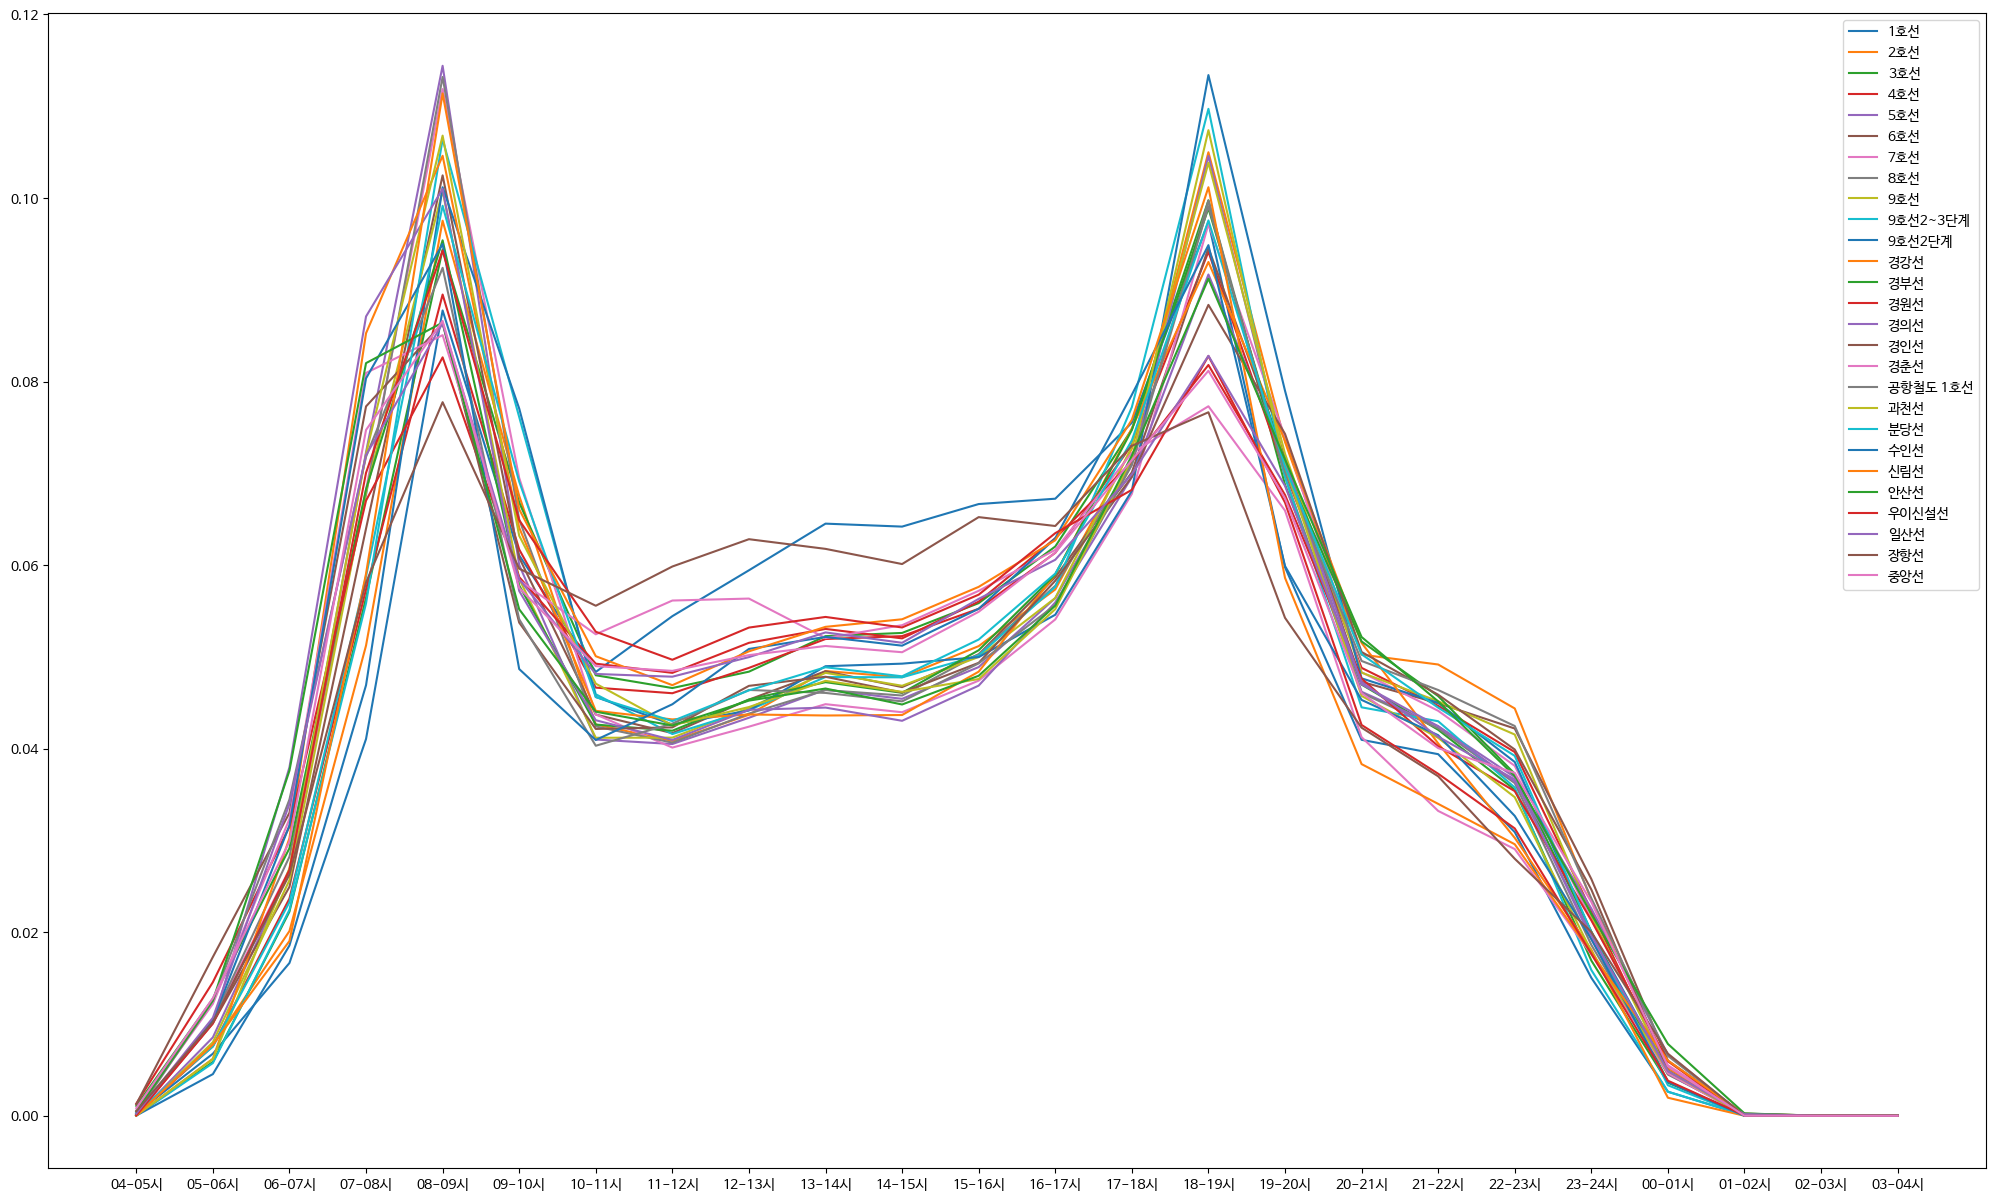

In [ ]:
#호선별 시간별 밀집도 plot
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rc('font', family = 'NanumBarunGothic')

plt.plot(df_line_time.T)
plt.legend(df_line_time.index)
plt.gcf().set_size_inches(25, 15)

In [ ]:
#1호선 시간별 밀집도 분석
df_line = df_re.copy()
df_line = df_line.groupby(['호선명', '지하철역'])[list(df_line.columns[3:-1])].sum().reset_index()
df_line['sum'] = df_line.iloc[:, 2:].sum(axis = 1)
df_line.head()

,호선명,지하철역,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시,sum
0,1호선,동대문,60006,1528617,1757010,2949151,4947195,4797750,4607457,5150937,5659346,5812348,5861303,5776447,5587564,5603923,5571055,4817766,3675936,3145171,2769085,1872651,423752,7249,248,0,82381967
1,1호선,동묘앞,11617,378808,732424,1600263,3383103,2552738,2761710,3800546,4665777,5583469,5928707,5827477,5332817,4584897,3704330,2090811,1286886,1165928,1002428,577680,275998,19245,771,15,57268445
2,1호선,서울역,91804,1806647,5834780,13684412,27216427,18680358,13164641,13894078,15508448,15699020,14204480,16950927,17853404,22013984,29766437,18533102,13056204,12842468,9635518,4569111,886546,43813,756,1,285937366
3,1호선,시청,6535,624023,2385309,7203666,17627075,8656108,5292465,5658915,5639249,6442305,6651123,7055897,7351681,9475683,16090936,7946979,5932608,5839236,3920313,1511078,173030,4038,131,0,131488383
4,1호선,신설동,27756,1049768,1776595,4492695,9311280,5685359,4097378,4134357,4250036,4572464,4385889,4673955,5057631,6349307,8653262,4919111,3180355,2969581,2494157,1388558,244600,2283,167,1,83716545


In [ ]:
#역별 유동인구 합계를 이용한 시간별 밀집도 계산
df_line.iloc[:, 2: -1] = df_line.iloc[:, 2: -1].apply(lambda x: x / df_line['sum'])
df_line.head()

,호선명,지하철역,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시,sum
0,1호선,동대문,0.000728,0.018555,0.021328,0.035799,0.060052,0.058238,0.055928,0.062525,0.068696,0.070554,0.071148,0.070118,0.067825,0.068024,0.067625,0.058481,0.044621,0.038178,0.033613,0.022731,0.005144,0.000088,3.010368e-06,0.000000e+00,82381967
1,1호선,동묘앞,0.000203,0.006615,0.012789,0.027943,0.059074,0.044575,0.048224,0.066364,0.081472,0.097496,0.103525,0.101757,0.093120,0.080060,0.064684,0.036509,0.022471,0.020359,0.017504,0.010087,0.004819,0.000336,1.346291e-05,2.619243e-07,57268445
2,1호선,서울역,0.000321,0.006318,0.020406,0.047858,0.095183,0.065330,0.046040,0.048591,0.054237,0.054904,0.049677,0.059282,0.062438,0.076989,0.104101,0.064815,0.045661,0.044914,0.033698,0.015979,0.003100,0.000153,2.643936e-06,3.497269e-09,285937366
3,1호선,시청,0.000050,0.004746,0.018141,0.054786,0.134058,0.065832,0.040250,0.043037,0.042888,0.048995,0.050583,0.053662,0.055911,0.072065,0.122375,0.060439,0.045119,0.044409,0.029815,0.011492,0.001316,0.000031,9.962857e-07,0.000000e+00,131488383
4,1호선,신설동,0.000332,0.012540,0.021222,0.053666,0.111224,0.067912,0.048943,0.049385,0.050767,0.054618,0.052390,0.055831,0.060414,0.075843,0.103364,0.058759,0.037990,0.035472,0.029793,0.016586,0.002922,0.000027,1.994827e-06,1.194507e-08,83716545


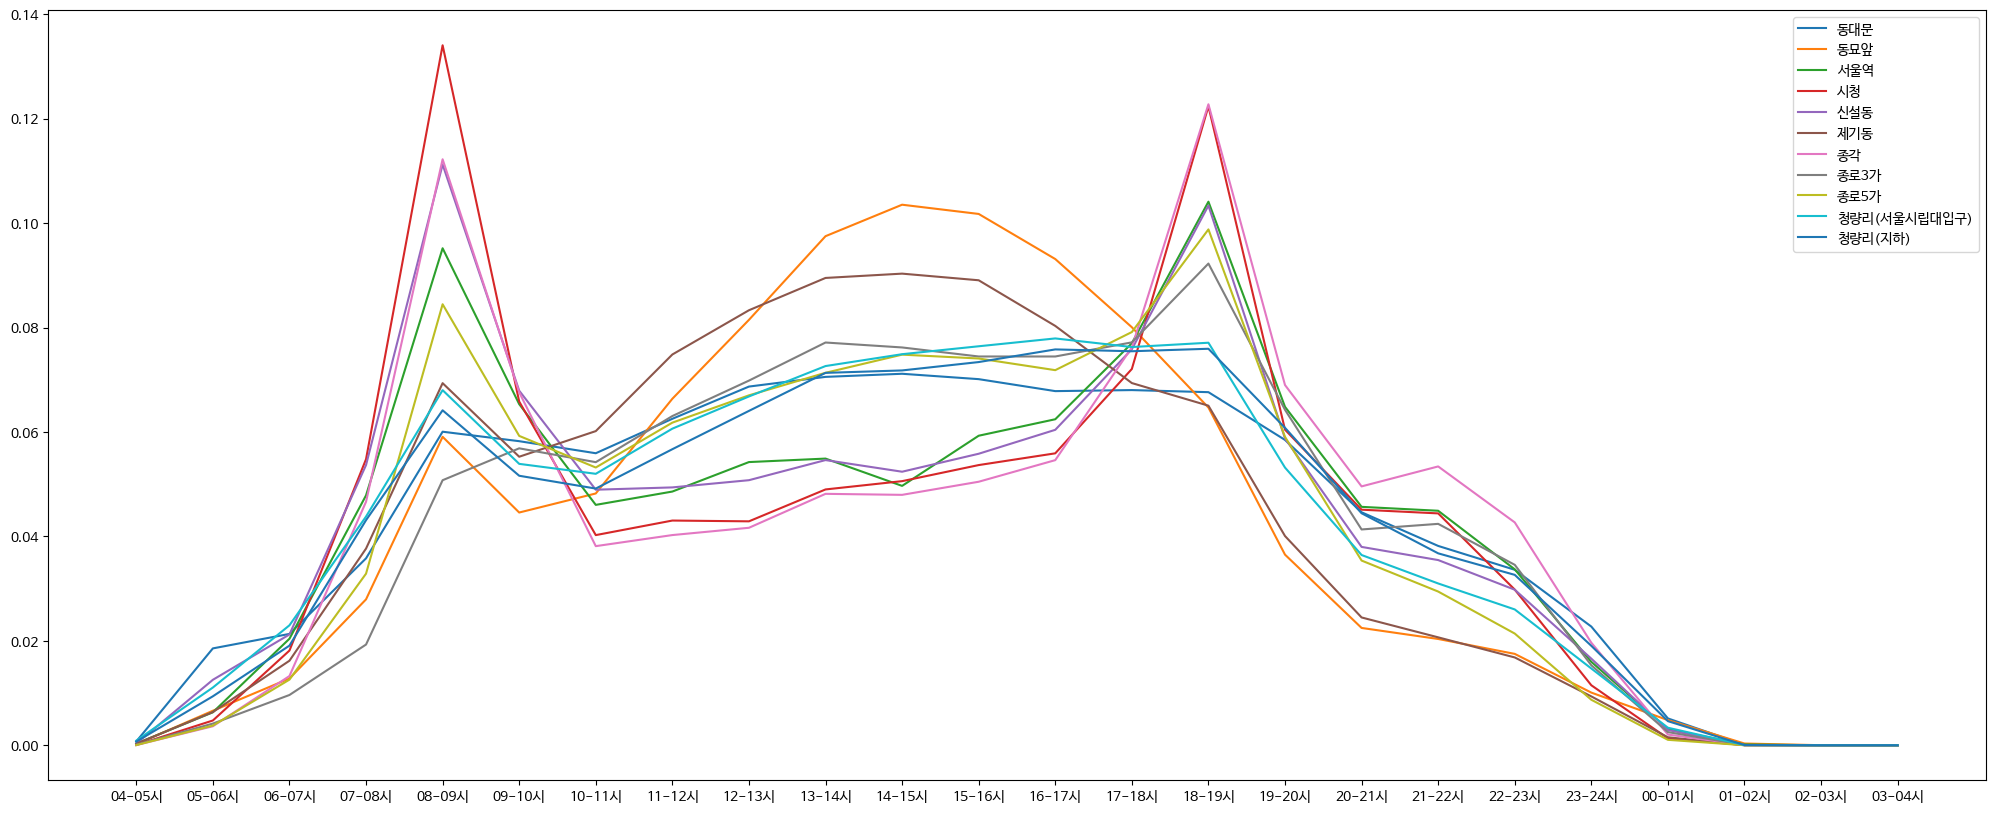

In [ ]:
#1호선 역 plot
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rc('font', family = 'NanumBarunGothic')

line1 = df_line[df_line['호선명'] == '1호선']

plt.plot(line1.iloc[:, 2: -1].T)
plt.legend(line1['지하철역'])
plt.gcf().set_size_inches(25, 10)

In [ ]:
#1호선 대부분의 역이 출퇴근 시간대에 밀집도가 몰려있음
#특이사항으로는 동묘앞역과 제기동역이 10~17시 까지의 밀집도가 출퇴근 시간대의 밀집도 보다 높은것으로 나타남
#일상을 보내는 사람들이 동묘앞역과 제기동역을 많이 이용하는 것으로 예상됨

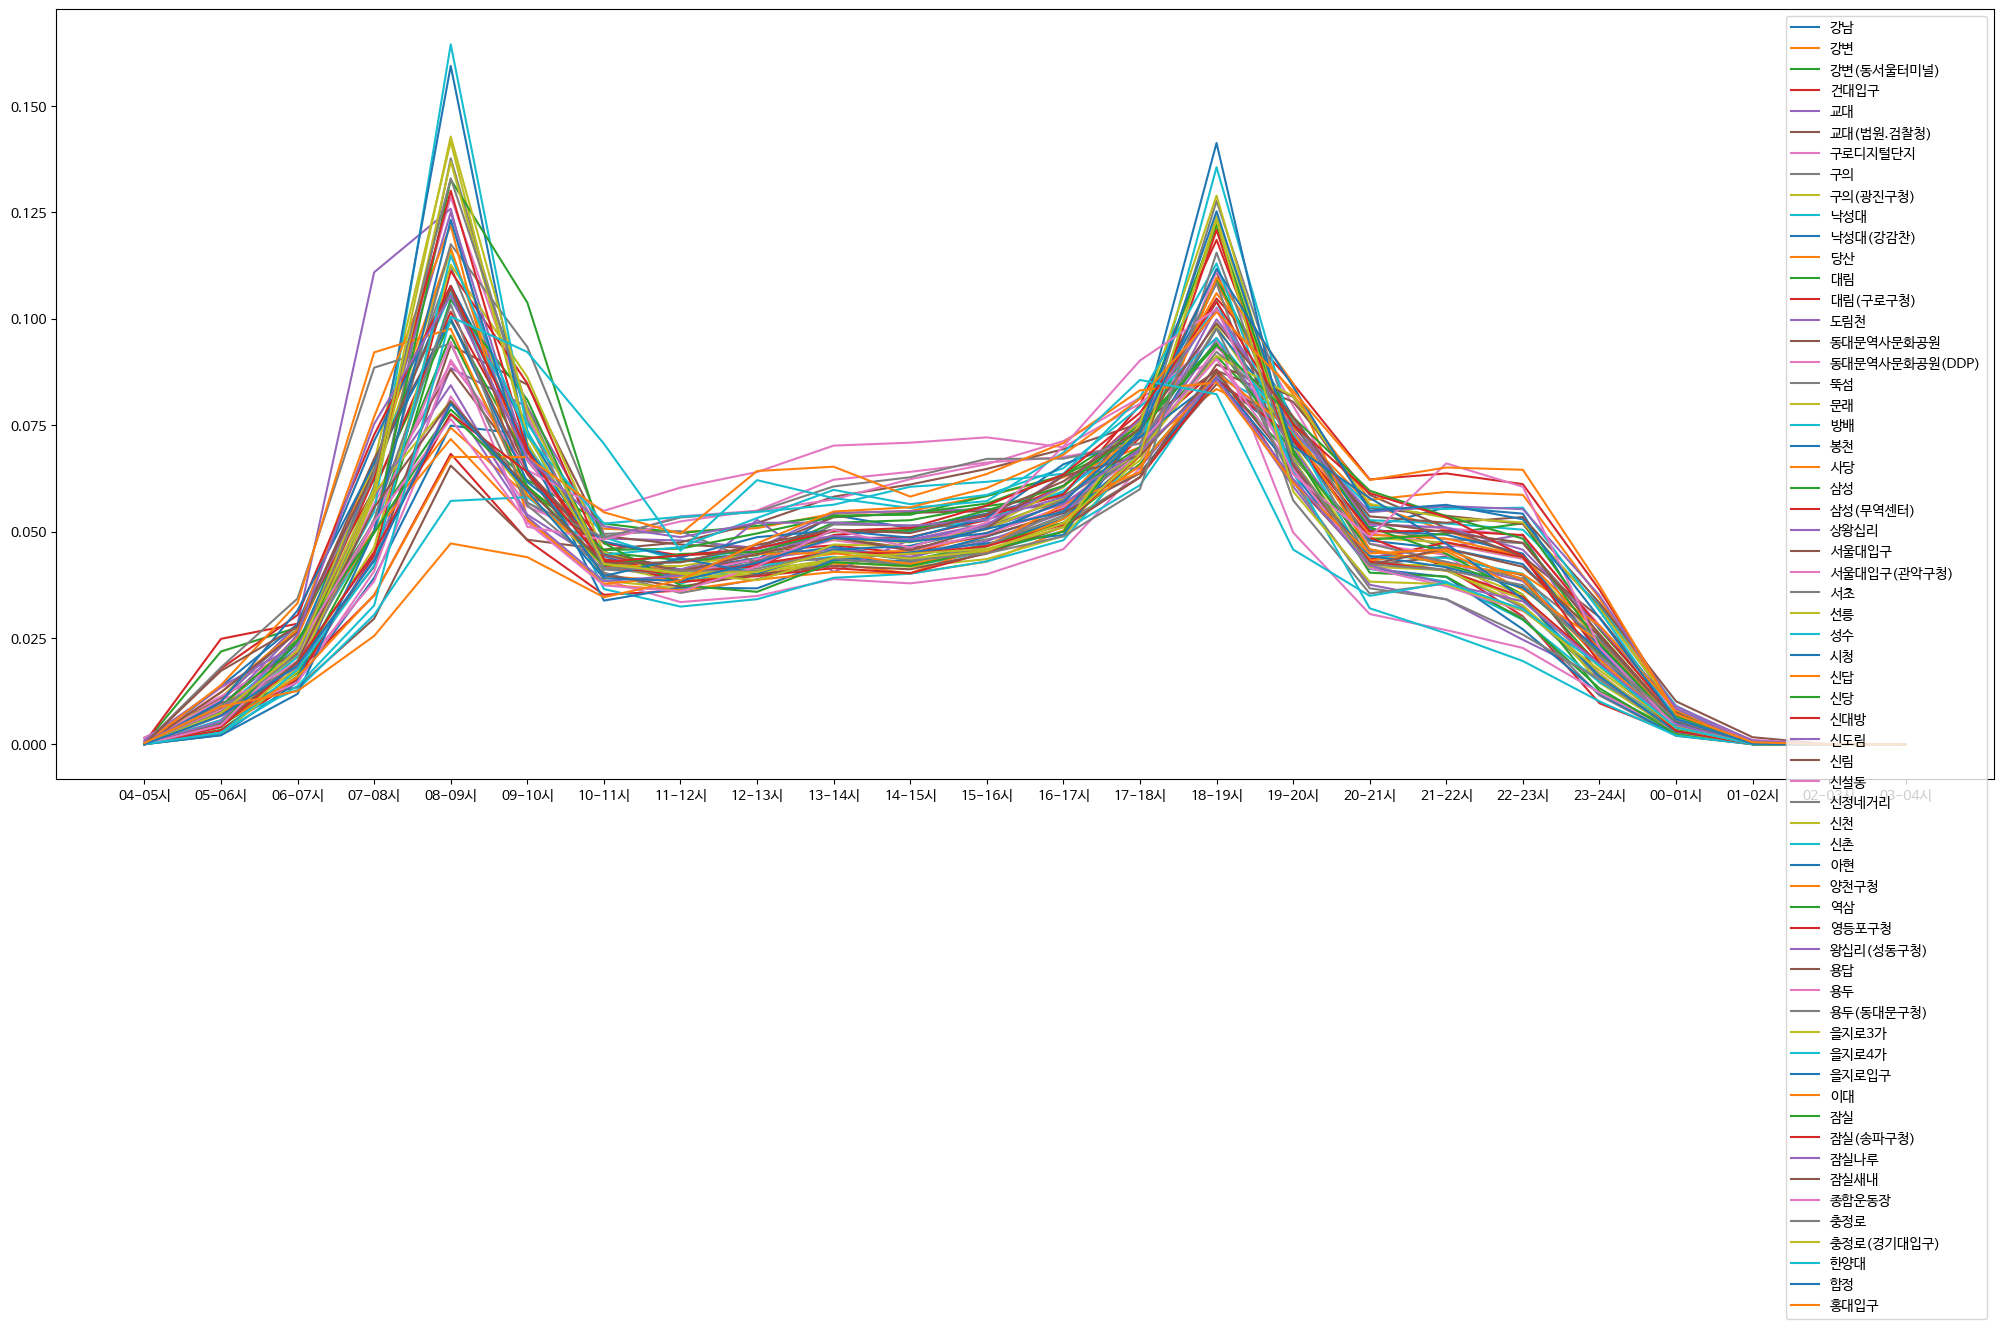

In [ ]:
#2호선 역 plot
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rc('font', family = 'NanumBarunGothic')

line2 = df_line[df_line['호선명'] == '2호선']

plt.plot(line2.iloc[:, 2: -1].T)
plt.legend(line2['지하철역'])
plt.gcf().set_size_inches(25, 10)

In [ ]:
# 2호선 역 plotly
line2 = df_line[df_line['호선명'] == '2호선']
line2_T = line2.iloc[:, 2:-1].T
line2_T.columns = line2['지하철역']
line2_T.head()

지하철역,강남,강변,강변(동서울터미널),건대입구,교대,교대(법원.검찰청),구로디지털단지,구의,구의(광진구청),낙성대,낙성대(강감찬),당산,대림,대림(구로구청),도림천,동대문역사문화공원,동대문역사문화공원(DDP),뚝섬,문래,방배,봉천,사당,삼성,삼성(무역센터),상왕십리,서울대입구,서울대입구(관악구청),서초,선릉,성수,시청,신답,신당,신대방,신도림,신림,신설동,신정네거리,신천,신촌,아현,양천구청,역삼,영등포구청,왕십리(성동구청),용답,용두,용두(동대문구청),을지로3가,을지로4가,을지로입구,이대,잠실,잠실(송파구청),잠실나루,잠실새내,종합운동장,충정로,충정로(경기대입구),한양대,합정,홍대입구
04-05시,0.000045,0.000018,0.000012,0.000145,0.000008,0.000011,0.000069,0.000020,0.000028,0.000050,0.000027,0.000034,0.000209,0.000347,0.000029,0.000284,0.000441,0.000023,0.000010,0.000015,0.000052,0.000047,0.000051,0.000054,0.000055,0.001532,0.001497,0.000013,0.000042,0.000025,0.000037,0.000045,0.000048,0.000098,0.000966,0.000077,0.000134,0.000078,0.000034,0.000041,0.000045,0.000060,0.000018,0.000037,0.000709,0.000062,0.000047,0.000163,0.000012,0.000011,0.000041,0.000035,0.000046,0.000025,0.000012,0.000024,0.000023,0.000043,0.000048,0.000013,0.000044,0.000316
05-06시,0.004747,0.005066,0.005453,0.008426,0.004169,0.004753,0.013323,0.010395,0.011011,0.008130,0.009084,0.008403,0.021821,0.024795,0.010011,0.009761,0.010414,0.005670,0.005298,0.005710,0.013626,0.006661,0.003405,0.003246,0.008669,0.010995,0.011270,0.005037,0.004223,0.005544,0.002181,0.012248,0.009010,0.017800,0.013566,0.012242,0.006629,0.018080,0.005295,0.005243,0.010026,0.013921,0.004262,0.007190,0.008872,0.017279,0.007944,0.009170,0.002296,0.002658,0.002132,0.004637,0.004652,0.004026,0.005408,0.004706,0.004483,0.007605,0.007324,0.002766,0.006730,0.008904
06-07시,0.014746,0.024034,0.024454,0.017088,0.019544,0.019390,0.022091,0.027158,0.027783,0.022726,0.023507,0.025320,0.027458,0.028355,0.028201,0.013417,0.016907,0.021839,0.021058,0.020553,0.028275,0.022441,0.016030,0.015359,0.026850,0.021914,0.021195,0.022673,0.018101,0.021846,0.014649,0.026857,0.024527,0.030394,0.023418,0.026327,0.014552,0.034283,0.019702,0.012880,0.031484,0.033209,0.016811,0.021688,0.018077,0.027726,0.019550,0.018262,0.017125,0.017600,0.011842,0.015848,0.024334,0.019210,0.025830,0.019470,0.022449,0.021168,0.022010,0.013722,0.018539,0.012536
07-08시,0.039114,0.050388,0.052137,0.035000,0.044750,0.041745,0.063514,0.062468,0.062773,0.065787,0.064274,0.065876,0.059930,0.059763,0.110937,0.029546,0.038320,0.050023,0.066288,0.049879,0.071277,0.049875,0.044403,0.044505,0.064170,0.058082,0.056519,0.052482,0.046301,0.054685,0.060741,0.076988,0.052174,0.072751,0.058351,0.067106,0.040675,0.088520,0.059094,0.030441,0.066079,0.092122,0.050145,0.062564,0.043554,0.064351,0.051951,0.052900,0.058241,0.042035,0.050082,0.035124,0.049696,0.045192,0.075296,0.055707,0.052310,0.063824,0.060115,0.032633,0.043158,0.025468
08-09시,0.074900,0.074383,0.078680,0.068276,0.088421,0.093784,0.128694,0.112300,0.115928,0.105952,0.107750,0.116633,0.099527,0.101643,0.125869,0.065507,0.081776,0.137712,0.141582,0.104581,0.107742,0.071744,0.104560,0.111218,0.125024,0.088102,0.089646,0.117540,0.112714,0.164508,0.159459,0.121940,0.096073,0.107720,0.084391,0.100085,0.090340,0.094189,0.080686,0.057206,0.099919,0.097660,0.132733,0.130093,0.080525,0.107051,0.094623,0.103375,0.136954,0.114839,0.123261,0.067546,0.077534,0.077613,0.105456,0.080627,0.076481,0.133023,0.142831,0.100492,0.080013,0.047204


In [ ]:
import plotly.express as px
fig=  px.line(line2_T)
fig.show()

In [ ]:
#대부분의 역들이 출퇴근 시간대에 밀집도가 올라가는 것을 확인 할 수 있음

#특정 역은 출퇴근 시간대의 밀집도가 낮음
#이점을 참고하여 몇몇 역은 지나치는 급행열차를 도입하는 것이 출퇴근 효율을 올릴 수 있는 방법 중 하나라고 예상됨

### 시간대별 분석

In [ ]:
df_time = df_re.copy()
df_time = df_time.groupby('호선명')[list(df_time.columns[3: -1])].sum()
df_time.head()

,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시
호선명,,,,,,,,,,,,,,,,,,,,,,,,
1호선,381515,9626754,23695989,58445859,124912820,86934532,68844473,77496054,84609720,91845211,91386319,94884513,95713002,107502095,138613702,85080728,58314867,56087917,44005307,21400880,3731450,102497,2550,18
2호선,1299524,62123303,163079910,415199570,790338777,547431604,345472413,331016479,354043498,392692943,387224087,414690779,464710485,589110354,850754253,594923000,407167298,398459465,359644004,190559396,42112082,1840777,44413,4725
3호선,187773,17444757,66165672,167801272,280738529,198751075,142765091,138621124,143926149,155438198,156479974,166136392,184488827,222436365,296677959,204554879,139735057,125095318,105689095,50303276,10709182,314921,6262,333
4호선,390214,23205483,72445877,175571016,273864223,188861027,142775102,140908273,149362511,158988725,159952363,169060338,187735623,223775741,288126868,214627648,149367507,136715425,121296926,68407808,14813381,460328,5454,244
5호선,70362,28100527,87402901,237872794,376386292,197436133,134864549,133261085,142672222,152744266,149459016,160843731,185557192,233367571,344070416,234130987,151989574,139634238,121412043,63356187,14982916,427334,9709,206


In [ ]:
#minmaxscaler을 이용한 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_time)

scaled_data = scaler.transform(df_time)

mmscaled_data = pd.DataFrame(scaled_data, columns = df_time.columns, index = df_time.index)

mmscaled_data.head()

,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시
호선명,,,,,,,,,,,,,,,,,,,,,,,,
1호선,0.135983,0.153403,0.143827,0.138958,0.156295,0.157303,0.197560,0.232510,0.237372,0.232349,0.234425,0.227223,0.204378,0.180926,0.161459,0.141764,0.142029,0.139679,0.121291,0.111086,0.086682,0.055643,0.057416,0.003810
2호선,0.463755,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3호선,0.066808,0.279482,0.404699,0.402893,0.353869,0.361924,0.411988,0.417556,0.405267,0.394614,0.402876,0.399395,0.395794,0.376395,0.347578,0.342879,0.342275,0.313083,0.293013,0.262966,0.252727,0.171047,0.140995,0.070476
4호선,0.139089,0.372383,0.443276,0.421645,0.345153,0.343826,0.412017,0.424480,0.420654,0.403674,0.411862,0.406461,0.402795,0.378673,0.337510,0.359835,0.365965,0.342282,0.336464,0.358104,0.350391,0.250042,0.122802,0.051640
5호선,0.024887,0.451324,0.535150,0.572014,0.475142,0.359518,0.389070,0.401329,0.401717,0.387740,0.384707,0.386606,0.398098,0.394986,0.403383,0.392665,0.372414,0.349617,0.336784,0.331558,0.354426,0.232117,0.218607,0.043598


In [ ]:
import plotly.express as px
fig = px.line(mmscaled_data.T)
fig.show()

In [ ]:
#모든 호선중 2호선이 가장 높은 시간대별 밀집도를 차지하고 있다는 것을 알 수 있음
#2호선에 많은 혼잡이 예상됨으로 배차시간의 조정이 필요하다 생각됨

In [ ]:
#호선, 지하철역, 시간별 밀집도 분석
df_all = df_re.copy()
df_all = df_all.groupby(['호선명', '지하철역'])[list(df_all.columns[3:-1])].sum().reset_index()
df_all.head()

,호선명,지하철역,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시
0,1호선,동대문,60006,1528617,1757010,2949151,4947195,4797750,4607457,5150937,5659346,5812348,5861303,5776447,5587564,5603923,5571055,4817766,3675936,3145171,2769085,1872651,423752,7249,248,0
1,1호선,동묘앞,11617,378808,732424,1600263,3383103,2552738,2761710,3800546,4665777,5583469,5928707,5827477,5332817,4584897,3704330,2090811,1286886,1165928,1002428,577680,275998,19245,771,15
2,1호선,서울역,91804,1806647,5834780,13684412,27216427,18680358,13164641,13894078,15508448,15699020,14204480,16950927,17853404,22013984,29766437,18533102,13056204,12842468,9635518,4569111,886546,43813,756,1
3,1호선,시청,6535,624023,2385309,7203666,17627075,8656108,5292465,5658915,5639249,6442305,6651123,7055897,7351681,9475683,16090936,7946979,5932608,5839236,3920313,1511078,173030,4038,131,0
4,1호선,신설동,27756,1049768,1776595,4492695,9311280,5685359,4097378,4134357,4250036,4572464,4385889,4673955,5057631,6349307,8653262,4919111,3180355,2969581,2494157,1388558,244600,2283,167,1


In [ ]:
#2호선만 가져오기
line2 = df_all[df_all['호선명'] == '2호선']
line2.head()

,호선명,지하철역,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시
11,2호선,강남,23431,2474511,7687324,20390609,39045993,37941918,21692872,20618813,22663061,28086223,26484559,28268733,30742448,39371177,56485635,40013138,26606350,29041236,28262067,13004235,2376075,23261,1951,183
12,2호선,강변,1144,327817,1555281,3260694,4813478,3781619,3279546,3228868,3288043,3510518,3548895,3780620,4062369,4518861,5403176,4838801,3643774,3250700,2847296,1456400,310718,3020,75,0
13,2호선,강변(동서울터미널),2086,932202,4180410,8912943,13450403,10616624,8869620,8491317,8774795,9191883,9223560,9980273,10798002,12339215,15589694,12412734,8995435,7864742,6577420,3146969,590499,10086,529,40
14,2호선,건대입구,35062,2042733,4142792,8485105,16552246,11627516,8520186,8760197,10480821,11716260,11805589,12776530,14737319,18594539,25401825,20540015,15093177,15434096,14823232,8805510,1957680,98578,1802,160
15,2호선,교대,412,212434,995871,2280284,4505555,4040953,2464812,2440807,2351264,2770968,2792135,2816095,2852222,3491272,5228528,3337193,2239882,2360820,2511473,1036268,225056,1199,114,0


In [ ]:
#index 정리
line2 = line2.drop(['호선명'], axis = 1)
line2.set_index(line2['지하철역'], inplace = True)
line2 = line2.drop(['지하철역'], axis = 1)
line2.head()

,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,23431,2474511,7687324,20390609,39045993,37941918,21692872,20618813,22663061,28086223,26484559,28268733,30742448,39371177,56485635,40013138,26606350,29041236,28262067,13004235,2376075,23261,1951,183
강변,1144,327817,1555281,3260694,4813478,3781619,3279546,3228868,3288043,3510518,3548895,3780620,4062369,4518861,5403176,4838801,3643774,3250700,2847296,1456400,310718,3020,75,0
강변(동서울터미널),2086,932202,4180410,8912943,13450403,10616624,8869620,8491317,8774795,9191883,9223560,9980273,10798002,12339215,15589694,12412734,8995435,7864742,6577420,3146969,590499,10086,529,40
건대입구,35062,2042733,4142792,8485105,16552246,11627516,8520186,8760197,10480821,11716260,11805589,12776530,14737319,18594539,25401825,20540015,15093177,15434096,14823232,8805510,1957680,98578,1802,160
교대,412,212434,995871,2280284,4505555,4040953,2464812,2440807,2351264,2770968,2792135,2816095,2852222,3491272,5228528,3337193,2239882,2360820,2511473,1036268,225056,1199,114,0


In [ ]:
#minmaxscaler을 이용한 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(line2)

scaled_data = scaler.transform(line2)

mmscaled_data = pd.DataFrame(scaled_data, columns = line2.columns, index = line2.index)

mmscaled_data.head()

,04-05시,05-06시,06-07시,07-08시,08-09시,09-10시,10-11시,11-12시,12-13시,13-14시,14-15시,15-16시,16-17시,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-24시,00-01시,01-02시,02-03시,03-04시
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,0.073167,0.537929,0.779190,0.811023,0.898800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.858191,0.822875,0.083683,0.477239,0.367470
강변,0.003157,0.066821,0.152965,0.124554,0.105152,0.096092,0.145609,0.150256,0.138950,0.119261,0.127803,0.127736,0.126505,0.110084,0.091377,0.116737,0.132987,0.108586,0.097808,0.092824,0.103722,0.009662,0.018111,0.000000
강변(동서울터미널),0.006116,0.199458,0.421052,0.351064,0.305391,0.276951,0.404993,0.407401,0.382788,0.322869,0.343599,0.348567,0.347027,0.309768,0.272568,0.306926,0.335053,0.268064,0.230223,0.204872,0.201141,0.035502,0.129222,0.080321
건대입구,0.109703,0.443172,0.417210,0.333919,0.377304,0.303700,0.388779,0.420540,0.458606,0.413337,0.441789,0.448169,0.475998,0.469491,0.447101,0.511010,0.565290,0.529688,0.522939,0.579908,0.677190,0.359115,0.440773,0.321285
교대,0.000858,0.041499,0.095837,0.085265,0.098013,0.102954,0.107805,0.111748,0.097318,0.092758,0.099025,0.093380,0.086885,0.083846,0.088271,0.079030,0.079979,0.077828,0.085887,0.064979,0.073894,0.003002,0.027655,0.000000


In [ ]:
import plotly.express as px
fig = px.line(mmscaled_data.T, markers = True)
fig.show()

# 결론

1호선과 2호선을 분석해본결과

출퇴근 시간대에 밀집도가 집중이 심했고,

마찬가지로 특정역에 밀집도가 높아졌음

이러한 밀집현상을 혼잡시간 + 혼잡역으로 규정

단순히 배차시간을 줄이는 것은 밀집현상을 줄일 수 있겠지만,

특정 몇몇역에서는 출퇴근 시간대에 밀집현상이 보이지 않음

즉, 승객이 타지 않아서 배차시간을 줄이면 오히려 손해가 발생할 수 있음

이를 고려하여 밀집현상 완화와 승객수를 모두 충족할 수 있는 방안은

출퇴근시간대에 밀집현상이 일어나는 역에 주로 정차하는 급행열차를 대안으로 제시함

다만, 이는 1호선과 2호선의 밀집현상 분석결과만 있고, 환승역과 같은 특정한 역의 조건은

분석에 포함하지 않았으므로, 해결방안에 좀 더 고려를 요함